# Weather Time Series Analysis and Forecasting
## Data Analysis of Weather Station Measurements (2020)

This notebook analyzes comprehensive meteorological data collected at 10-minute intervals throughout 2020 from a Max Planck Institute weather station. The dataset includes 20 meteorological indicators providing detailed insights into weather patterns and atmospheric conditions.

Our analysis will include:
1. Basic statistical analysis of weather patterns
2. Time series visualization
3. Wind pattern analysis using wind rose diagrams
4. Weather prediction using machine learning approaches

<div style="background-color: #f0f7ff; border: 2px solid #4a86e8; border-radius: 10px; padding: 15px; margin-top: 20px;">
<h3 style="color: #4a86e8; margin-top: 0;">📊 Dataset Information</h3>
<p style="margin-bottom: 0;">This notebook performs analysis on the <a href="https://www.kaggle.com/datasets/alistairking/weather-long-term-time-series-forecasting/" style="color: #4a86e8; font-weight: bold;">Weather Long-term Time Series Forecasting</a> dataset.</p>
</div>

### Setup and Import Dependencies
The first cell imports the necessary Python libraries:
- `pandas`: For data manipulation and analysis
- `numpy`: For numerical operations
- `matplotlib.pyplot`: For creating static visualizations
- `seaborn`: For statistical data visualization
- `scipy.stats`: For statistical functions
- `sklearn.preprocessing`: For data scaling and normalization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Data Loading and Initial Preprocessing

This section handles the loading and initial preparation of our weather dataset. The `load_and_prepare_data()` function performs several crucial preprocessing steps:

1. **Data Loading**: Reads the CSV file containing weather measurements from 2020
2. **Date Processing**: 
   - Converts the 'date' column to datetime format
   - Sets it as the DataFrame index for time series analysis
3. **Feature Engineering**: Creates new time-based features:
   - Hour of the day
   - Month of the year
   - Day of the month

The function returns a prepared DataFrame ready for analysis, and we display the first few rows to inspect the data structure.

*Note: The seasonal categorization is currently commented out but can be uncommented if seasonal analysis is needed.*

Expected columns in the output:
- Meteorological measurements (T, p, rh, etc.)
- Derived time features (hour, month, day)

In [3]:
def load_and_prepare_data(file_path="/kaggle/input/weather-long-term-time-series-forecasting/cleaned_weather.csv"):
    """
    Load and prepare the weather data for analysis
    """
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Convert date column to datetime
    df['date'] = pd.to_datetime(df['date'])
    
    # Set date as index
    df.set_index('date', inplace=True)
    
    # Add derived time features
    df['hour'] = df.index.hour
    df['month'] = df.index.month
    df['day'] = df.index.day
    # df['season'] = pd.cut(df.index.month, bins=[0, 3, 6, 9, 12], 
    #                      labels=['Winter', 'Spring', 'Summer', 'Fall'])
    
    return df

df = load_and_prepare_data()
df.head()

,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,H2OC,...,wd,rain,raining,SWDR,PAR,max. PAR,Tlog,hour,month,day
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,5.49,...,224.3,0.0,0.0,0.0,0.0,0.0,11.45,0,1,1
2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,5.45,...,206.8,0.0,0.0,0.0,0.0,0.0,11.51,0,1,1
2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,5.43,...,197.1,0.0,0.0,0.0,0.0,0.0,11.60,0,1,1
2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,5.37,...,206.4,0.0,0.0,0.0,0.0,0.0,11.70,0,1,1
2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,5.42,...,209.6,0.0,0.0,0.0,0.0,0.0,11.81,0,1,1


### Basic Statistical Analysis

This section calculates fundamental statistical measures for our meteorological data. We'll examine:

**1. Summary Statistics**
Using Pandas' `describe()` function to calculate:
- Central tendency (mean)
- Dispersion (std, min, max)
- Distribution characteristics (25th, 50th, 75th percentiles)

**2. Correlation Analysis**
Computing correlations between all numerical variables to identify:
- Relationships between different weather parameters
- Potential interdependencies in meteorological measurements

The `basic_statistics()` function returns two key components:
- `stats_df`: Summary statistics for each numerical column
- `correlations`: Correlation matrix showing relationships between variables

This gives us our first quantitative insight into the weather patterns and relationships between different meteorological measurements.

In [4]:
def basic_statistics(df):
    """
    Calculate basic statistics for numerical columns
    """
    stats_df = df.describe()
    correlations = df.corr()
    
    return stats_df, correlations

# Basic statistics
stats_df, correlations = basic_statistics(df)
print("\nBasic Statistics:")
stats_df.head()


Basic Statistics:


,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,H2OC,...,wd,rain,raining,SWDR,PAR,max. PAR,Tlog,hour,month,day
count,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,...,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000
mean,989.989233,10.818241,284.796938,5.409105,72.487133,14.487046,9.676828,4.810131,6.111159,9.782341,...,176.850276,0.011773,25.907469,131.331822,259.863438,308.601939,21.515206,11.500171,6.513891,15.754497
std,9.207149,7.468671,7.616995,5.956722,19.230260,7.632960,4.023504,5.539320,2.561536,4.082684,...,81.194840,0.123289,111.503420,215.735116,422.786515,569.956762,7.790620,6.922783,3.451478,8.810597
min,955.580000,-6.440000,266.190000,-13.810000,21.160000,3.770000,2.090000,0.000000,1.300000,2.090000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000,6.900000,0.000000,1.000000,1.000000
25%,984.800000,4.590000,278.550000,0.777500,58.820000,8.480000,6.460000,1.170000,4.070000,6.530000,...,141.100000,0.000000,0.000000,0.000000,0.000000,0.000000,15.240000,5.000000,4.000000,8.000000


### Analysis of Daily Weather Patterns

This section aggregates our 10-minute interval data into daily summaries, focusing on key weather parameters:

#### Daily Aggregation Metrics:
1. **Temperature ('T')**:
   - Daily mean temperature
   - Daily minimum temperature
   - Daily maximum temperature (daily temperature range)

2. **Humidity ('rh')**:
   - Mean daily relative humidity

3. **Solar Radiation ('SWDR')**:
   - Total daily solar radiation
   - Indicates daily sun exposure/cloud cover

4. **Precipitation ('rain')**:
   - Total daily rainfall
   - Important for identifying wet vs. dry days

The `analyze_daily_patterns()` function uses Pandas' `resample()` method to convert our high-frequency data into daily statistics, helping us understand day-to-day weather variations and patterns.

In [5]:
def analyze_daily_patterns(df):
    """
    Analyze daily patterns in temperature, humidity, and radiation
    """
    daily_stats = df.resample('D').agg({
        'T': ['mean', 'min', 'max'],
        'rh': 'mean',
        'SWDR': 'sum',
        'rain': 'sum'
    })
    
    return daily_stats

    
# Daily patterns
daily_stats = analyze_daily_patterns(df)
print("\nFirst few days of daily statistics:")
daily_stats.head()


First few days of daily statistics:


T                     rh     SWDR rain
                mean   min   max       mean      sum  sum
date                                                     
2020-01-01 -0.514196 -3.46  4.58  86.429301  8250.91  0.0
2020-01-02 -1.056319 -5.78  6.47  80.206042  9570.44  0.0
2020-01-03  4.835278  0.69  8.17  81.975000  1665.99  0.3
2020-01-04  3.784931  1.47  6.61  80.899861  1157.79  4.8
2020-01-05  2.735000  1.47  4.43  76.422639  4572.03  0.0

### Analysis of Extreme Weather Events

This section identifies and analyzes extreme weather conditions throughout the year. Understanding extreme events is crucial for:
- Climate pattern analysis
- Weather-related risk assessment
- Understanding the range of weather variations

#### Extreme Metrics Analyzed:
1. **Temperature Extremes**:
   - Highest recorded temperature
   - Lowest recorded temperature
   - Hottest day (by daily mean temperature)
   - Coldest day (by daily mean temperature)

2. **Wind Conditions**:
   - Maximum wind speed
   - Prevailing wind direction (most frequent)

3. **Precipitation**:
   - Maximum daily rainfall

The `analyze_extreme_events()` function calculates these extremes using various aggregation methods and time scales, from instantaneous measurements (like maximum temperature) to daily aggregates (like maximum daily rainfall).

In [6]:
def analyze_extreme_events(df):
    """
    Identify and analyze extreme weather events
    """
    extremes = {
        'highest_temp': df['T'].max(),
        'lowest_temp': df['T'].min(),
        'highest_wind': df['wv'].max(),
        'max_daily_rain': df.resample('D')['rain'].sum().max(),
        'hottest_day': df.resample('D')['T'].mean().idxmax(),
        'coldest_day': df.resample('D')['T'].mean().idxmin(),
        'prevailing_wind_direction': df.groupby('wd')['wv'].count().idxmax()
    }
    
    return extremes

# Extreme events
print("\nExtreme weather events:")
extremes = analyze_extreme_events(df)
for event, value in extremes.items():
    print(f"{event}: {value}")


Extreme weather events:
highest_temp: 34.8
lowest_temp: -6.44
highest_wind: 13.77
max_daily_rain: 46.4
hottest_day: 2020-08-08 00:00:00
coldest_day: 2020-01-25 00:00:00
prevailing_wind_direction: 210.3


### Weather Pattern Visualizations

This section creates a comprehensive visual analysis of key weather patterns using multiple plotting techniques. The visualization combines three key perspectives of the weather data into a single figure:

**1. Monthly Temperature Distribution (Box Plot)**
- Shows temperature variation within each month
- Displays median, quartiles, and outliers
- Helps identify seasonal temperature patterns
- Reveals month-to-month temperature variability

**2. Daily Temperature Cycle (Line Plot)**
- Displays average temperature for each hour of the day
- Reveals diurnal temperature patterns
- Shows timing of daily temperature peaks and troughs
- Useful for understanding daily temperature cycles

**3. Monthly Rainfall Totals (Bar Plot)**
- Shows total rainfall accumulation by month
- Identifies wet and dry months
- Reveals seasonal precipitation patterns
- Helps understand annual rainfall distribution

The `plot_weather_patterns()` function uses:
- Seaborn's style for enhanced visualization
- Multiple subplot layout for comparative analysis
- Different plot types appropriate for each metric
- Consistent labeling and sizing

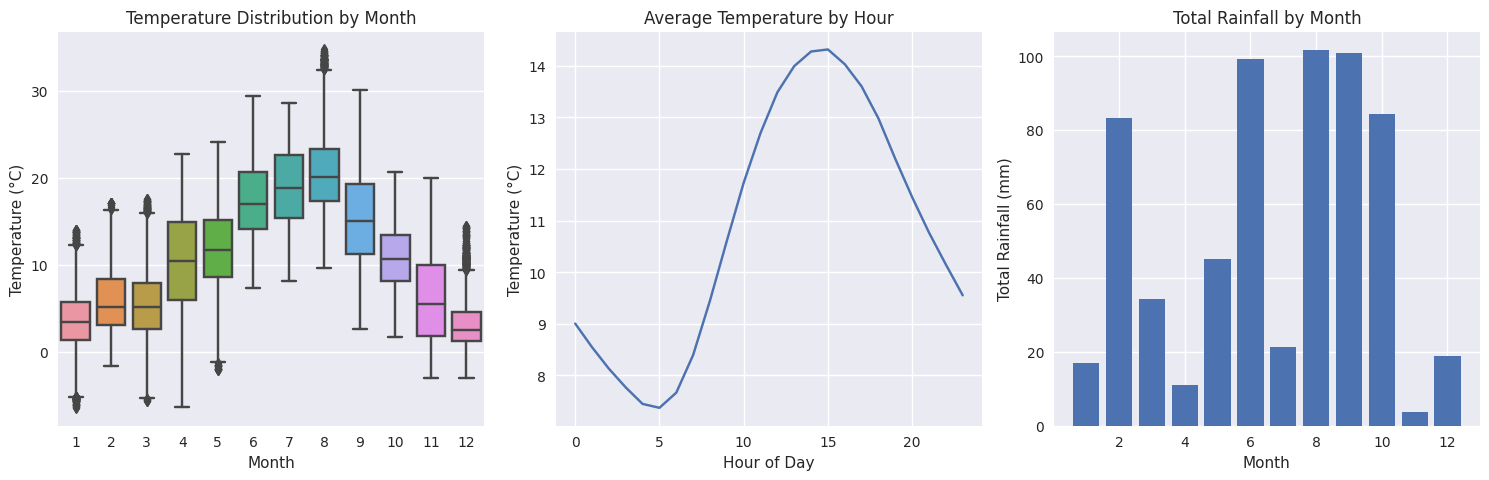

In [7]:
def plot_weather_patterns(df):
    """
    Create visualizations of weather patterns
    """
    plt.style.use('seaborn')
    
    # Create main figure with three subplots
    fig = plt.figure(figsize=(15, 9))
    
    # Temperature variation by month
    ax1 = plt.subplot(231)
    sns.boxplot(data=df, x='month', y='T', ax=ax1)
    ax1.set_title('Temperature Distribution by Month')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Temperature (°C)')
    
    # Daily temperature pattern
    ax2 = plt.subplot(232)
    hourly_temp = df.groupby('hour')['T'].mean()
    ax2.plot(hourly_temp.index, hourly_temp.values)
    ax2.set_title('Average Temperature by Hour')
    ax2.set_xlabel('Hour of Day')
    ax2.set_ylabel('Temperature (°C)')
    
    # Rainfall pattern by month
    ax3 = plt.subplot(233)
    monthly_rain = df.groupby('month')['rain'].sum()
    ax3.bar(monthly_rain.index, monthly_rain.values)
    ax3.set_title('Total Rainfall by Month')
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Total Rainfall (mm)')
        
    plt.tight_layout()
    return fig

    
# Create and save plots
fig = plot_weather_patterns(df)

### Wind Pattern Analysis: Wind Rose Diagram

This section creates a detailed wind rose diagram to visualize the joint distribution of wind speed and direction throughout the year. A wind rose is a specialized polar plot that shows:
- How wind speeds are distributed
- Which directions the wind commonly blows from
- The relationship between wind speed and direction

#### Components of the Analysis:

1. **Wind Speed Categories**:
   - Binned into 6 ranges (in m/s):
     - Light: 0-2
     - Gentle: 2-4
     - Moderate: 4-6
     - Fresh: 6-8
     - Strong: 8-10
     - Very Strong: >10

2. **Wind Directions**:
   - Divided into 16 compass directions:
   - Principal: N, E, S, W
   - Ordinal: NE, SE, SW, NW
   - Inter-ordinal: NNE, ENE, ESE, etc.

3. **Visualization Features**:
   - Polar coordinates with North at 0°
   - Color-coded speed categories
   - Length of each "petal" shows frequency
   - Stacked bars show speed distribution

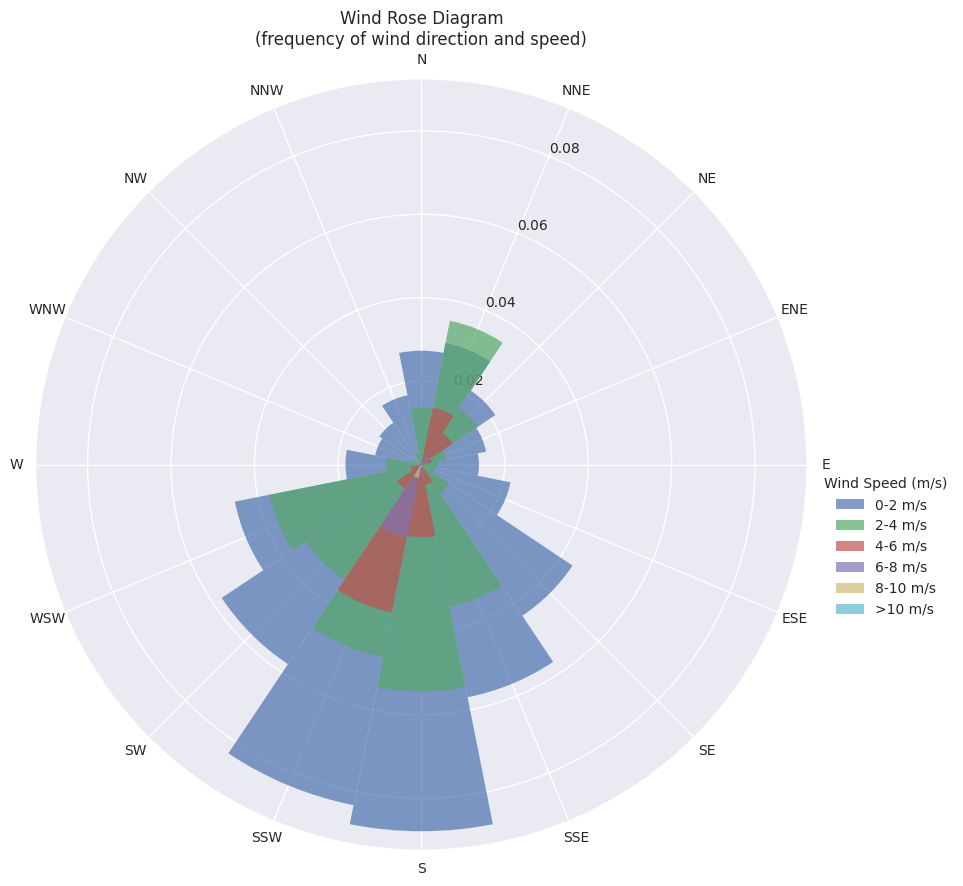

In [8]:
def create_wind_rose(df):
    """
    Create a wind rose diagram
    """
    # Convert wind directions to radians
    wd_rad = np.radians(df['wd'])
    
    # Define wind speed bins
    speed_bins = [0, 2, 4, 6, 8, 10, np.inf]
    speed_labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '>10']
    
    # Create direction bins (16 compass directions)
    dir_bins = np.linspace(0, 2*np.pi, 17)
    dir_labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
                 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
    
    # Categorize wind speeds
    df['speed_cat'] = pd.cut(df['wv'], bins=speed_bins, labels=speed_labels)
    
    # Create figure
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='polar')
    
    # Plot each speed category
    for speed_label in speed_labels:
        mask = df['speed_cat'] == speed_label
        if mask.any():
            hist, _ = np.histogram(wd_rad[mask], bins=dir_bins)
            hist = hist / len(df)  # Convert to frequency
            width = dir_bins[1] - dir_bins[0]
            ax.bar(dir_bins[:-1], hist, width=width, bottom=0.0, 
                  label=f'{speed_label} m/s', alpha=0.7)
    
    # Customize the plot
    ax.set_theta_direction(-1)
    ax.set_theta_zero_location('N')
    ax.set_thetagrids(np.degrees(dir_bins[:-1]), dir_labels)
    ax.set_title('Wind Rose Diagram\n(frequency of wind direction and speed)')
    plt.legend(title='Wind Speed (m/s)', bbox_to_anchor=(1.2, 0.5))
    
    return fig
    
# Create separate wind rose plot
wind_rose_fig = create_wind_rose(df)

### Time Series Forecasting: Setup and Model Imports

This section imports the necessary libraries and tools for implementing weather forecasting models. We'll be using both traditional statistical methods and modern deep learning approaches.

#### Imported Components:

1. **Data Preprocessing Tools**:
   - `StandardScaler`: For standardizing features to zero mean and unit variance
   - `MinMaxScaler`: For scaling features to a fixed range (0-1)

2. **Model Evaluation Metrics**:
   - `mean_squared_error`: For measuring prediction accuracy
   - `mean_absolute_error`: For measuring average magnitude of errors
   - `r2_score`: For measuring goodness of fit

3. **Statistical Time Series Model**:
   - `SARIMAX`: Seasonal AutoRegressive Integrated Moving Average with eXogenous factors
   - Handles both seasonal patterns and trends in weather data

4. **Deep Learning Components** (TensorFlow/Keras):
   - `Sequential`: For building the neural network layer by layer
   - `LSTM`: Long Short-Term Memory layers for sequence prediction
   - `Dense`: Regular fully-connected neural network layers
   - `Dropout`: For preventing overfitting
   - `Adam`: Efficient gradient-based optimizer

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

### Weather Prediction Model Implementation

This section implements the `WeatherPredictor` class, which uses a GPU-accelerated LSTM approach for weather forecasting. The class provides a comprehensive framework for time series prediction with multiple features.

#### Class Components:

1. **GPU Configuration and Management**:
   - Automatic GPU detection and memory growth configuration
   - Mixed precision training for improved GPU performance
   - Fallback to CPU when GPU is unavailable
   - Optimized batch processing for GPU acceleration

2. **Data Preparation (`prepare_data_for_lstm`)**:
   - Handles multivariate input (T, rh, p, wv, SWDR)
   - Applies MinMax scaling to normalize features
   - Creates sequences for time series prediction
   - Implements 80-20 train-test split
   - Configurable sequence length and forecast horizon
   - TensorFlow tensor conversion for GPU processing

3. **LSTM Model (`build_lstm_model`, `train_lstm`)**:
   - Architecture:
     - Two LSTM layers (100 and 50 units)
     - Dropout layers (0.2) for regularization
     - Dense layers for output
   - Training parameters:
     - Adam optimizer with loss scaling for mixed precision
     - MSE loss function and MAE metrics
     - Configurable epochs (default 50)
     - 20% validation split
   - GPU Optimizations:
     - Increased batch size (64) for GPU efficiency
     - Learning rate reduction on plateau
     - Early stopping with best weights restoration

4. **Prediction Utilities**:
   - `make_future_predictions`: Generates 24-hour forecasts
   - Automatic tensor-to-numpy conversions
   - RMSE calculation for model evaluation
   - Built-in visualization of forecasts and training history

In [10]:
class WeatherPredictor:
    def __init__(self, df):
        """
        Initialize the weather predictor with dataset and configure GPU
        """
        self.df = df
        self.scalers = {}
        self.lstm_model = None
        
        # Configure GPU memory growth
        gpus = tf.config.list_physical_devices('GPU')
        if gpus:
            try:
                for gpu in gpus:
                    tf.config.experimental.set_memory_growth(gpu, True)
                print(f"GPU(s) detected: {len(gpus)}")
                print("Using GPU for training")
            except RuntimeError as e:
                print(f"GPU configuration error: {e}")
        else:
            print("No GPU detected. Using CPU for training")
        
    def prepare_data_for_lstm(self, target_variable, sequence_length=24, forecast_horizon=24):
        """
        Prepare data for LSTM model with multi-variable input
        """
        features = ['T', 'rh', 'p', 'wv', 'SWDR']
        data = self.df[features].copy()
        
        # Scale the data
        for feature in features:
            self.scalers[feature] = MinMaxScaler()
            data[feature] = self.scalers[feature].fit_transform(data[feature].values.reshape(-1, 1))
        
        X, y = [], []
        target_scaler = self.scalers[target_variable]
        
        for i in range(len(data) - sequence_length - forecast_horizon + 1):
            X.append(data[i:(i + sequence_length)].values)
            y.append(data[target_variable][i + sequence_length:i + sequence_length + forecast_horizon])
        
        X = np.array(X)
        y = np.array(y)
        
        # Convert to TensorFlow tensors
        X = tf.convert_to_tensor(X, dtype=tf.float32)
        y = tf.convert_to_tensor(y, dtype=tf.float32)
        
        # Split into train and test sets
        train_size = int(len(X) * 0.8)
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]
        
        return (X_train, y_train), (X_test, y_test), target_scaler
    
    def build_lstm_model(self, input_shape, output_length):
        """
        Build and compile LSTM model with mixed precision training
        """
        tf.keras.mixed_precision.set_global_policy('mixed_float16')
        
        model = Sequential([
            LSTM(100, return_sequences=True, input_shape=input_shape, dtype='float32'),
            Dropout(0.2),
            LSTM(50, dtype='float32'),
            Dropout(0.2),
            Dense(30, dtype='float32'),
            Dense(output_length, dtype='float32')
        ])
        
        optimizer = Adam(learning_rate=0.001)
        optimizer = tf.keras.mixed_precision.LossScaleOptimizer(optimizer)
        model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
        return model
    
    def train_lstm(self, target_variable='T', sequence_length=24, forecast_horizon=24, epochs=50):
        """
        Train LSTM model for weather prediction with GPU acceleration
        """
        print(f"\nTraining LSTM model for {target_variable} prediction...")
        
        (X_train, y_train), (X_test, y_test), target_scaler = self.prepare_data_for_lstm(
            target_variable, sequence_length, forecast_horizon
        )
        
        self.lstm_model = self.build_lstm_model(
            input_shape=(sequence_length, X_train.shape[2]),
            output_length=forecast_horizon
        )
        
        batch_size = 64
        callbacks = [
            tf.keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.2,
                patience=5,
                min_lr=0.0001
            ),
            tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True
            )
        ]
        
        history = self.lstm_model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=0.2,
            callbacks=callbacks,
            verbose=1
        )
        
        train_pred = self.lstm_model.predict(X_train, batch_size=batch_size)
        test_pred = self.lstm_model.predict(X_test, batch_size=batch_size)
        
        # Convert tensors to numpy if needed
        if isinstance(train_pred, tf.Tensor):
            train_pred = train_pred.numpy()
        if isinstance(test_pred, tf.Tensor):
            test_pred = test_pred.numpy()
        if isinstance(y_train, tf.Tensor):
            y_train = y_train.numpy()
        if isinstance(y_test, tf.Tensor):
            y_test = y_test.numpy()
        
        train_pred = target_scaler.inverse_transform(train_pred)
        test_pred = target_scaler.inverse_transform(test_pred)
        y_train_orig = target_scaler.inverse_transform(y_train)
        y_test_orig = target_scaler.inverse_transform(y_test)
        
        train_rmse = np.sqrt(mean_squared_error(y_train_orig, train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test_orig, test_pred))
        
        print(f"Train RMSE: {train_rmse:.2f}")
        print(f"Test RMSE: {test_rmse:.2f}")
        
        return history, (train_pred, test_pred)
    
    def make_future_predictions(self, steps=24):
        """
        Make future predictions using trained LSTM model
        """
        if self.lstm_model is None:
            raise ValueError("Model not trained yet")
            
        last_sequence = self.df[['T', 'rh', 'p', 'wv', 'SWDR']].iloc[-24:].copy()
        for feature in last_sequence.columns:
            last_sequence[feature] = self.scalers[feature].transform(
                last_sequence[feature].values.reshape(-1, 1)
            )
        
        sequence_tensor = tf.convert_to_tensor(
            last_sequence.values.reshape(1, 24, 5),
            dtype=tf.float32
        )
        prediction = self.lstm_model.predict(sequence_tensor, batch_size=1)
        
        if isinstance(prediction, tf.Tensor):
            prediction = prediction.numpy()
            
        prediction = self.scalers['T'].inverse_transform(prediction)
        
        return prediction[0]

### Running Weather Predictions with GPU-Accelerated LSTM

This section executes the weather forecasting model using a GPU-accelerated LSTM approach for efficient and accurate predictions.

#### Prediction Process:

1. **Model Training**:
   - Target variable: Temperature ('T')
   - Uses 24-hour sequence length (previous day)
   - Predicts 24 time steps ahead (full day forecast)
   - Trains for 5 epochs with GPU acceleration
   - Features used: Temperature, Relative Humidity, Pressure, Wind Velocity, Solar Radiation
   - Uses MinMaxScaler for data normalization
   - Leverages mixed precision training for GPU optimization
   - Captures both training and validation loss history

2. **Future Predictions**:
   - Generates 24-hour temperature forecasts
   - Utilizes the last 24 hours of all features
   - GPU-accelerated inference for faster prediction
   - Automatically handles CPU/GPU data transfers
   - Returns denormalized temperature values

3. **Visualization**:
   - Two-panel visualization:
     - Top panel: 24-hour LSTM temperature forecast
     - Bottom panel: Training and validation loss history
   - Features:
     - Clear markers for prediction points
     - Grid lines for better readability
     - Proper axis labeling and scaling
     - Automatic layout adjustment
     - Legend for data identification
     - Separated training metrics visualization

In [11]:
def run_predictions(df):
    """
    Run LSTM predictions with improved plotting
    """
    predictor = WeatherPredictor(df)
    
    # Train and evaluate LSTM
    lstm_history, (lstm_train_pred, lstm_test_pred) = predictor.train_lstm(
        target_variable='T',
        sequence_length=24,
        forecast_horizon=24,
        epochs=5
    )
    
    # Make future predictions
    lstm_future = predictor.make_future_predictions(steps=24)
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    
    # Plot forecast
    ax1.plot(range(24), lstm_future, label='LSTM Forecast', marker='o')
    ax1.set_title('24-Hour Temperature Forecast')
    ax1.set_xlabel('Hours Ahead')
    ax1.set_ylabel('Temperature')
    ax1.legend()
    ax1.grid(True)
    
    # Plot loss history
    ax2.plot(lstm_history.history['loss'], label='Training Loss', marker='.')
    ax2.plot(lstm_history.history['val_loss'], label='Validation Loss', marker='.')
    ax2.set_title('LSTM Training History')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)
    
    # Adjust layout
    plt.tight_layout()
    
    return predictor, fig


Running weather predictions...
GPU(s) detected: 1
Using GPU for training

Training LSTM model for T prediction...
Epoch 1/5
527/527 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0293 - mae: 0.1064 - val_loss: 0.0023 - val_mae: 0.0375 - learning_rate: 0.0010
Epoch 2/5
527/527 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0029 - mae: 0.0399 - val_loss: 0.0019 - val_mae: 0.0329 - learning_rate: 0.0010
Epoch 3/5
527/527 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0023 - mae: 0.0350 - val_loss: 0.0019 - val_mae: 0.0337 - learning_rate: 0.0010
Epoch 4/5
527/527 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0020 - mae: 0.0330 - val_loss: 0.0015 - val_mae: 0.0285 - learning_rate: 0.0010
Epoch 5/5
527/527 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0019 - mae: 0.0315 - val_loss: 0.0014 - val_mae: 0.0260 - learning_rate: 0.0010
659/659 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train RMSE: 1.56
Test RMSE: 1.27
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


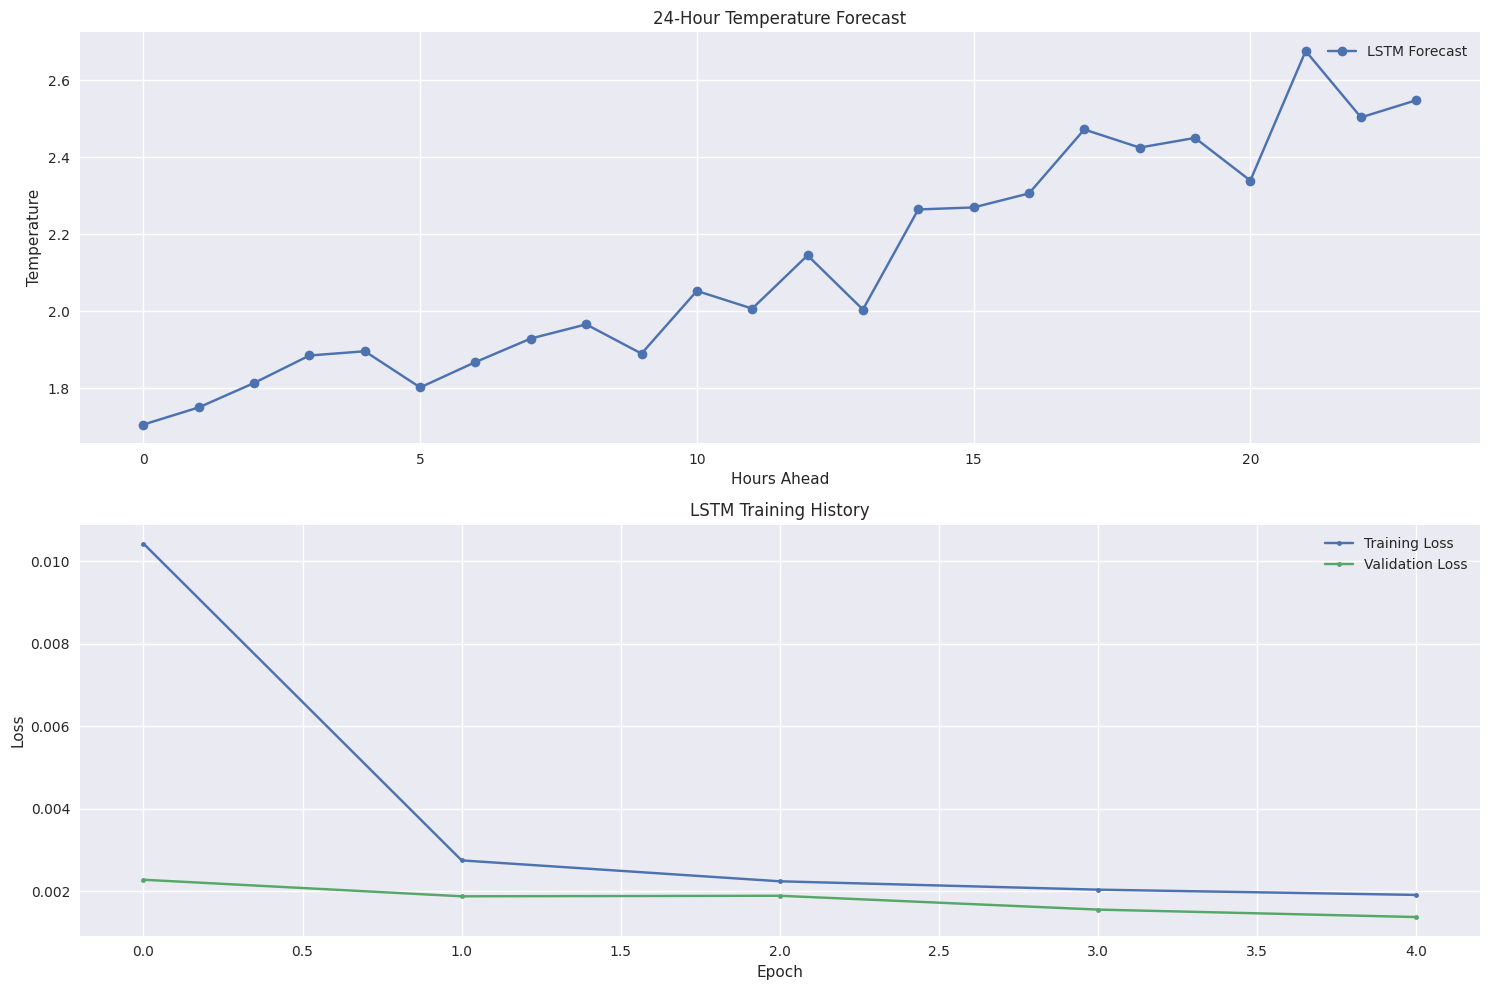

In [12]:
# Run predictions
print("\nRunning weather predictions...")
predictor, fig = run_predictions(df)

<div style="background-color: #f8f9fa; border: 2px solid #6c757d; border-radius: 10px; padding: 15px; margin-top: 30px; text-align: center;">
  <h2 style="color: #6c757d; margin-top: 0;">
    <span style="display: inline-block; background-color: #6c757d; color: white; width: 30px; height: 30px; line-height: 30px; border-radius: 50%; margin-right: 10px;">📝</span>
    Credits
  </h2>
  <p style="font-style: italic; margin-bottom: 0;">
    For credits & acknowledgements, please refer to the
    <a href="https://www.kaggle.com/datasets/alistairking/weather-long-term-time-series-forecasting/" style="color: #007bff; text-decoration: none; border-bottom: 1px dotted #007bff; font-weight: bold;">
      dataset description on Kaggle
    </a>
  </p>
</div>